##In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

| Obs | X1 | X2 |
| --- | -- | -- |
|  1  |  1 |  4 |
|  2  |  1 |  3 |
|  3  |  0 |  4 |
|  4  |  5 |  1 |
|  5  |  6 |  2 |
|  6  |  4 |  0 |

###(a) Plot the observations.

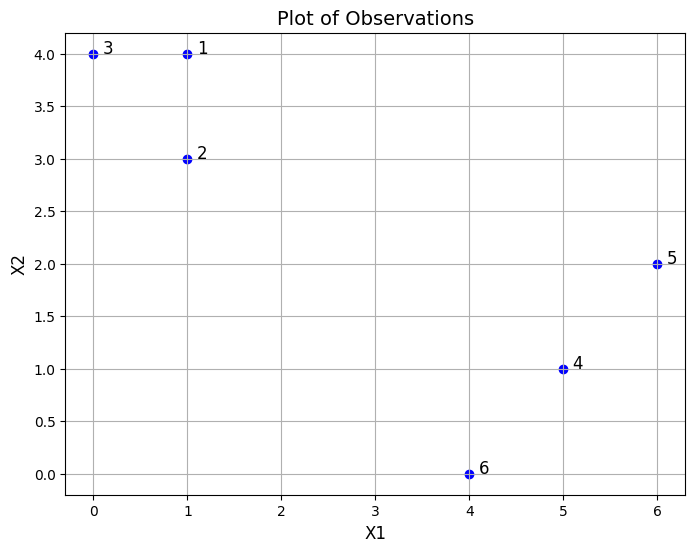

In [8]:
import matplotlib.pyplot as plt

# Data for the observations
observations = {
    'Obs': [1, 2, 3, 4, 5, 6],
    'X1': [1, 1, 0, 5, 6, 4],
    'X2': [4, 3, 4, 1, 2, 0]
}

# Plot the observations
plt.figure(figsize=(8, 6))
plt.scatter(observations['X1'], observations['X2'], color='blue', label='Observations')

# Annotating points with their observation numbers
for i, obs in enumerate(observations['Obs']):
    plt.text(observations['X1'][i] + 0.1, observations['X2'][i], f'{obs}', fontsize=12)

# Set plot labels and title
plt.title('Plot of Observations', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

###(b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [17]:
import numpy as np

np.random.seed(42)

cluster_labels = np.random.choice([0, 1], size=len(observations['Obs']))

cluster_labels_output = list(zip(observations['Obs'], cluster_labels))
cluster_labels_output

[(1, 0), (2, 1), (3, 0), (4, 0), (5, 0), (6, 1)]

* Observation 1: Cluster 0
* Observation 2: Cluster 1
* Observation 3: Cluster 0
* Observation 4: Cluster 0
* Observation 5: Cluster 0
* Observation 6: Cluster 1

###(c) Compute the centroid for each cluster.

In [18]:
X1 = np.array(observations['X1'])
X2 = np.array(observations['X2'])

cluster_0_indices = np.where(cluster_labels == 0)
cluster_1_indices = np.where(cluster_labels == 1)

centroid_0 = [X1[cluster_0_indices].mean(), X2[cluster_0_indices].mean()]
centroid_1 = [X1[cluster_1_indices].mean(), X2[cluster_1_indices].mean()]

centroid_0, centroid_1

([3.0, 2.75], [2.5, 1.5])

* Cluster 0 centroid: (3.0,2.75)
* Cluster 1 centroid: (2.5,1.5)

###(d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [19]:
# Function to compute Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Reassign each observation to the closest centroid
new_cluster_labels = []
for i in range(len(observations['Obs'])):
    # Compute distance to centroid 0
    dist_to_centroid_0 = euclidean_distance(observations['X1'][i], observations['X2'][i], centroid_0[0], centroid_0[1])
    # Compute distance to centroid 1
    dist_to_centroid_1 = euclidean_distance(observations['X1'][i], observations['X2'][i], centroid_1[0], centroid_1[1])

    # Assign to the closest centroid
    if dist_to_centroid_0 < dist_to_centroid_1:
        new_cluster_labels.append(0)
    else:
        new_cluster_labels.append(1)

# Display the new cluster labels for each observation
new_cluster_labels_output = list(zip(observations['Obs'], new_cluster_labels))
new_cluster_labels_output


[(1, 0), (2, 0), (3, 0), (4, 1), (5, 0), (6, 1)]

* Observation 1: Cluster 0
* Observation 2: Cluster 0
* Observation 3: Cluster 0
* Observation 4: Cluster 1
* Observation 5: Cluster 0
* Observation 6: Cluster 1

### (e) Repeat (c) and (d) until the answers obtained stop changing.

In [20]:
import numpy as np

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def update_centroids_and_reassign_v3(X1, X2, cluster_labels):
    prev_labels = np.array([])
    iteration = 0

    while not np.array_equal(prev_labels, cluster_labels):
        prev_labels = cluster_labels.copy()

        cluster_0_indices = np.where(cluster_labels == 0)[0]
        cluster_1_indices = np.where(cluster_labels == 1)[0]

        if len(cluster_0_indices) == 0 or len(cluster_1_indices) == 0:
            print("One of the clusters became empty. Stopping.")
            break

        centroid_0 = [X1[cluster_0_indices].mean(), X2[cluster_0_indices].mean()]
        centroid_1 = [X1[cluster_1_indices].mean(), X2[cluster_1_indices].mean()]

        new_cluster_labels = []
        for i in range(len(X1)):
            dist_to_centroid_0 = euclidean_distance(X1[i], X2[i], centroid_0[0], centroid_0[1])
            dist_to_centroid_1 = euclidean_distance(X1[i], X2[i], centroid_1[0], centroid_1[1])
            if dist_to_centroid_0 < dist_to_centroid_1:
                new_cluster_labels.append(0)
            else:
                new_cluster_labels.append(1)

        cluster_labels = np.array(new_cluster_labels)
        iteration += 1

    return iteration, centroid_0, centroid_1, cluster_labels

X1 = np.array([1, 1, 0, 5, 6, 4])
X2 = np.array([4, 3, 4, 1, 2, 0])

np.random.seed(42)
initial_cluster_labels = np.random.choice([0, 1], size=6)

iterations, final_centroid_0, final_centroid_1, final_cluster_labels = update_centroids_and_reassign_v3(X1, X2, initial_cluster_labels)

print("Iterations:", iterations)
print("Final Centroid 0:", final_centroid_0)
print("Final Centroid 1:", final_centroid_1)
print("Final Cluster Labels:", list(zip(range(1, 7), final_cluster_labels)))


Iterations: 3
Final Centroid 0: [0.6666666666666666, 3.6666666666666665]
Final Centroid 1: [5.0, 1.0]
Final Cluster Labels: [(1, 0), (2, 0), (3, 0), (4, 1), (5, 1), (6, 1)]


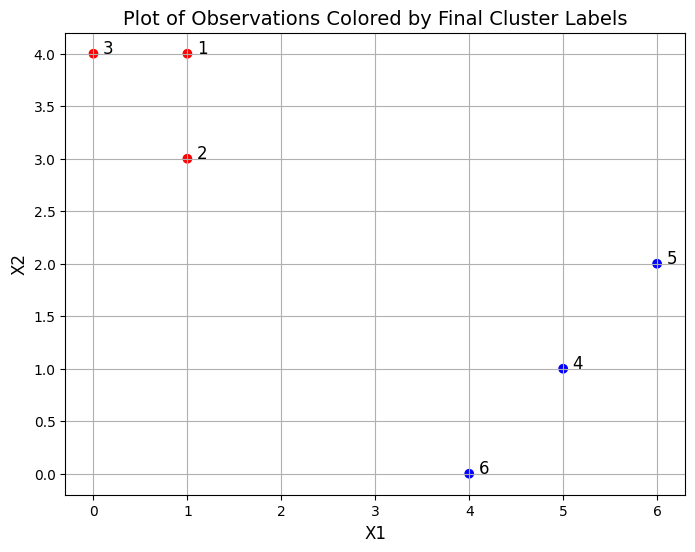

In [21]:
colors = ['red' if label == 0 else 'blue' for label in final_cluster_labels]

plt.figure(figsize=(8, 6))
plt.scatter(observations['X1'], observations['X2'], color=colors, label='Observations')

for i, obs in enumerate(observations['Obs']):
    plt.text(observations['X1'][i] + 0.1, observations['X2'][i], f'{obs}', fontsize=12)

plt.title('Plot of Observations Colored by Final Cluster Labels', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.grid(True)

plt.show()
